In [22]:
# MISTRAL HACKATHON
# https://docs.mistral.ai/quickstart
# I don't have CPU, so from local deployment on consumer grade hardware, check out the llama.cpp project or Ollama. I use: https://ollama.ai/ 

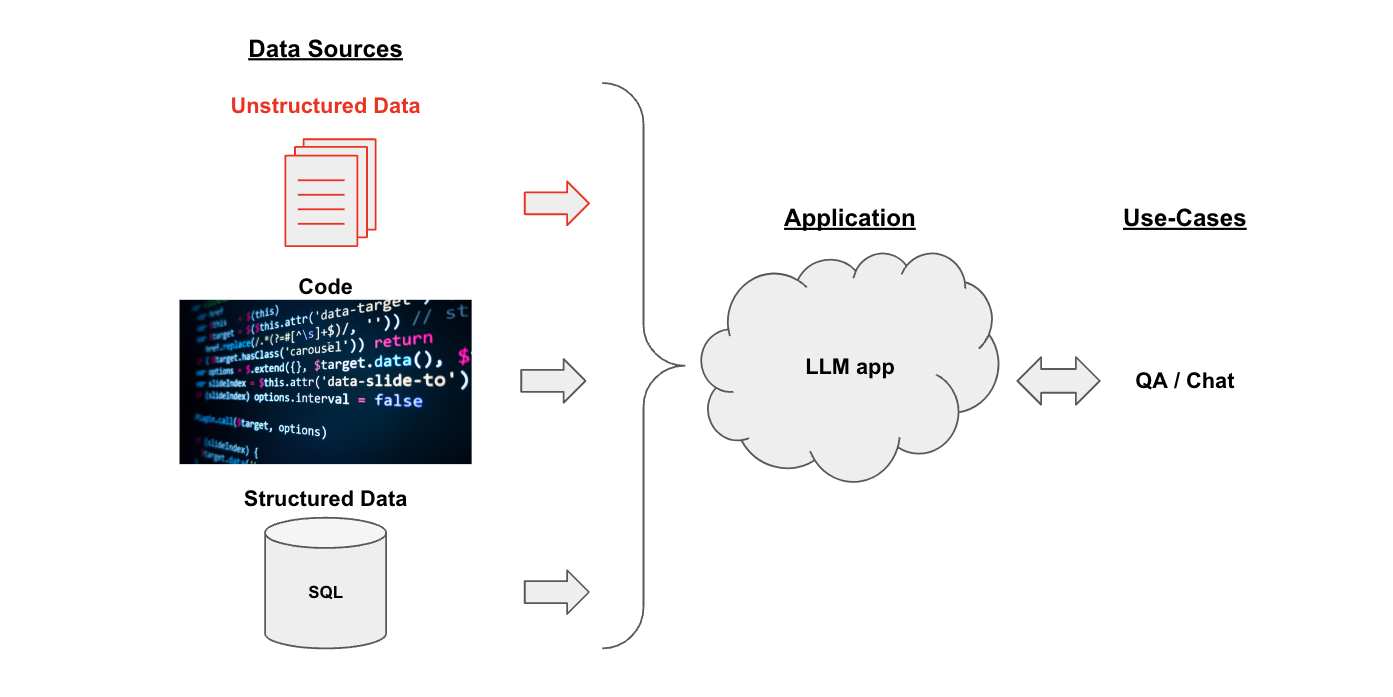

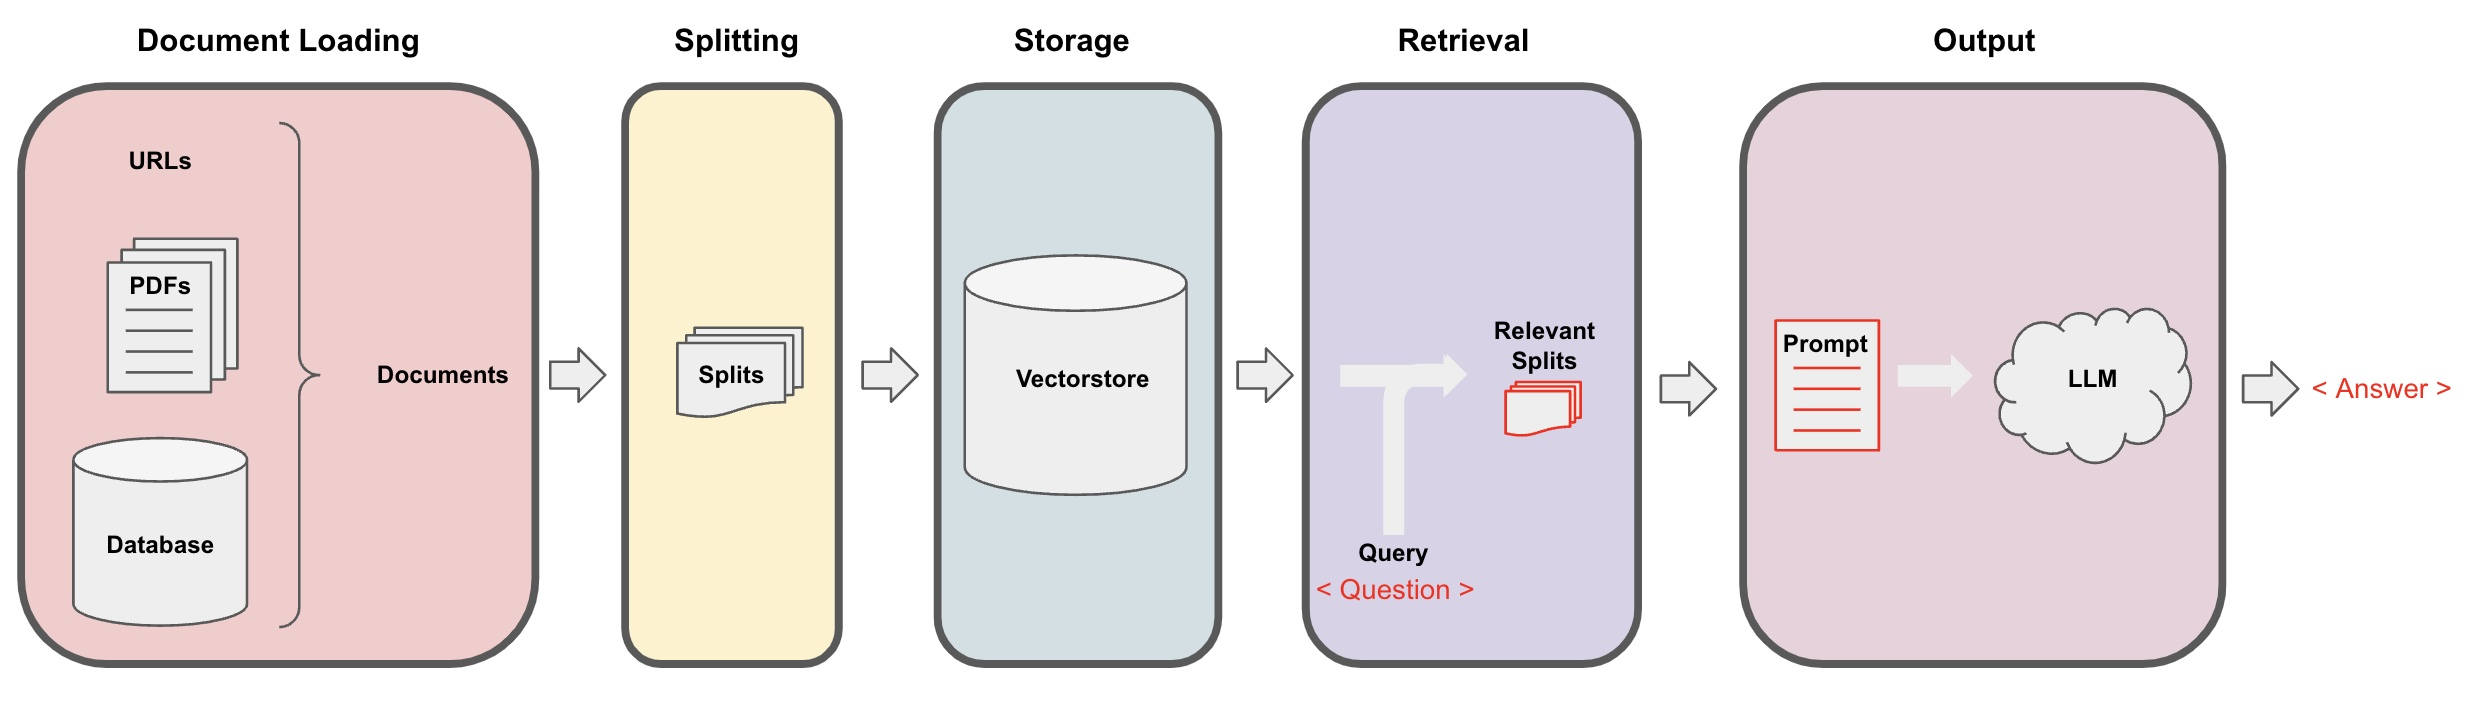

In [2]:
from IPython.display import display, Image

display(Image(filename='RAG.png'))  # Cambia 'tu_imagen.png'
display(Image(filename='RAG 2.jpeg'))  # Cambia 'tu_imagen.png'

In [23]:
# Interacting with Mistral 7B
# Model Mistral: https://ollama.ai/library/mistral

from langchain.llms import Ollama
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler  

# With StreamingStdOutCallbackHandler, you will see tokens streamed.

llm = Ollama(model="mistral", callback_manager = CallbackManager([StreamingStdOutCallbackHandler()]))

# llm("Tell me about the history of AI") # to much time to execute :(


In [41]:
# Ollama supports embeddings via OllamaEmbeddings:

# https://python.langchain.com/docs/use_cases/question_answering/
# https://python.langchain.com/docs/use_cases/question_answering/local_retrieval_qa

# !pip install chromadb
# !pip install html2text
# !pip install langchain

# Load web page
from langchain.document_loaders import AsyncHtmlLoader
from langchain.document_transformers import Html2TextTransformer


urls =                  ["https://mistral.ai/",
                        "https://mistral.ai/product/",
                        "https://mistral.ai/company/",
                        "https://mistral.ai/contact/",
                        "https://jobs.lever.co/mistral",
                        "https://mistral.ai/privacy-policy/",
                        "https://mistral.ai/terms-of-service/",
                        "https://mistral.ai/legal/",
                        "https://mistral.ai/news/",
                        "https://mistral.ai/news/announcing-mistral-7b/",
                        "https://mistral.ai/news/about-mistral-ai/",
                        "https://www.linkedin.com/company/mistralai/",
                        "https://twitter.com/MistralAI",
                        "https://discord.gg/mistralai",
                        "https://github.com/mistralai/",
                        "https://docs.mistral.ai/",
                        "https://docs.mistral.ai/quickstart",
                        "https://docs.mistral.ai/category/cloud-deployment",
                        "https://docs.mistral.ai/cloud-deployment/skypilot",
                        "https://docs.mistral.ai/cloud-deployment/aws",
                        "https://docs.mistral.ai/cloud-deployment/azure",
                        "https://docs.mistral.ai/cloud-deployment/gcp",
                        "https://docs.mistral.ai/cloud-deployment/ovh",
                        "https://docs.mistral.ai/category/usage",
                        "https://docs.mistral.ai/usage/how-to-use",
                        "https://docs.mistral.ai/usage/guardrailing",
                        "https://docs.mistral.ai/category/large-language-models",
                        "https://docs.mistral.ai/llm/mistral-v0.1",
                        "https://docs.mistral.ai/llm/mistral-instruct-v0.1",
                        "https://docs.mistral.ai/api",
                        "https://ollama.ai/",
                        "https://ollama.ai/library/mistral",
                        "https://github.com/jmorganca/ollama",
                        "https://python.langchain.com/docs/integrations/llms/ollama",
                        "https://js.langchain.com/docs/use_cases/question_answering/local_retrieval_qa"]

loader = AsyncHtmlLoader(urls)
text = loader.load()

html2text = Html2TextTransformer()
docs_transformed = html2text.transform_documents(text)


Fetching pages: 100%|##########| 35/35 [00:05<00:00,  6.56it/s]


In [42]:
# Split into chunks 

from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=100)
all_splits = text_splitter.split_documents(data)

In [43]:
# !pip install gpt4all
# from gpt4all import GPT4All, Embed4All

# Embed and store
from langchain.vectorstores import Chroma
from langchain.embeddings import GPT4AllEmbeddings
from langchain.embeddings import OllamaEmbeddings # We can also try Ollama embeddings

# vectorstore = Chroma.from_documents(documents=all_splits, embedding=GPT4AllEmbeddings())

oembed = OllamaEmbeddings(base_url="http://localhost:11434", model="mistral")

# oembed.embed_query("Mistral is a LLM company")

In [44]:
# Retrieve
question = "Which is the mission of Mistral?"
docs = vectorstore.similarity_search(question)
len(docs)

4

In [18]:
# !pip install langchainhub

# RAG prompt
from langchain import hub
QA_CHAIN_PROMPT = hub.pull("rlm/rag-prompt-mistral")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 1.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.15
    Uninstalling urllib3-1.26.15:
      Successfully uninstalled urllib3-1.26.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-auth 2.22.0 requires urllib3<2.0, but you have urllib3 2.0.7 which is incompatible.


In [19]:
# LLM
from langchain.llms import Ollama
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

llm = Ollama(model="mistral",
             verbose=True,
             callback_manager=CallbackManager([StreamingStdOutCallbackHandler()]))

In [20]:
# QA chain
from langchain.chains import RetrievalQA

qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectorstore.as_retriever(),
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT},
)

question = "Which is the mission of Mistral?"
result = qa_chain({"query": question})


Mistral AI is an open

KeyboardInterrupt: 

In [ ]:
# https://smith.langchain.com/hub/rlm/rag-prompt-mistral

from langchain.schema import LLMResult
from langchain.callbacks.base import BaseCallbackHandler

class GenerationStatisticsCallback(BaseCallbackHandler):
    def on_llm_end(self, response: LLMResult, **kwargs) -> None:
        print(response.generations[0][0].generation_info)
        
callback_manager = CallbackManager([StreamingStdOutCallbackHandler(), GenerationStatisticsCallback()])

llm = Ollama(base_url="http://localhost:11434",
             model="mistral",
             verbose=True,
             callback_manager=callback_manager)

qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectorstore.as_retriever(),
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT},
)

question = "What are the approaches to Task Decomposition?"
result = qa_chain({"query": question})

In [ ]:
# Using the Hub for prompt management
# https://python.langchain.com/docs/integrations/llms/ollama
# https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1
# https://smith.langchain.com/hub/rlm/rag-prompt-mistral

# LLM
from langchain.llms import Ollama
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
llm = Ollama(model="mistral:7b-instruct",
             verbose=True,
             callback_manager=CallbackManager([StreamingStdOutCallbackHandler()]))

from langchain import hub
QA_CHAIN_PROMPT = hub.pull("rlm/rag-prompt-mistral")

# QA chain
from langchain.chains import RetrievalQA
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectorstore.as_retriever(),
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT},
)

question = "Which is the mission of Mistral?"
result = qa_chain({"query": question})